<a href="https://colab.research.google.com/github/Trasadja/Depression-Disorder-prediction/blob/main/Oluwaseyi_Ala_77451971.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### install xlrd library to load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

df = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/Dissertation/1- mental-illnesses-prevalence.xls")
df.head()


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


### Data Understanding

In [ ]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'],
      dtype='object')

#### Dropping Some variables which will not have any impact to the model

In [ ]:
df = df.drop(['Entity', 'Code', 'Year'],axis = 1)

In [ ]:
df.head()

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815


In [ ]:
df.shape

(6420, 5)

#### Checking for missing values

In [ ]:
df.isna().any()

,0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,False
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,False
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,False
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,False
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,False


#### Checking for statistical analysis

In [ ]:
df.describe()

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,0.266604,3.767036,4.101840,0.636968,0.195664
std,0.039383,0.925286,1.050543,0.233391,0.138380
min,0.188416,1.522333,1.879996,0.181667,0.044780
25%,0.242267,3.080036,3.425846,0.520872,0.096416
50%,0.273477,3.636772,3.939547,0.579331,0.144150
75%,0.286575,4.366252,4.564164,0.844406,0.251167
max,0.462045,7.645899,8.624634,1.506730,1.031688


#  Exploratory Data analysis(EDA)

### Checking for the correlation matrix

In [ ]:
Data_correlation = df.corr()
Data_correlation

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,1.000000,-0.474994,0.304149,0.121542,0.500656
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,-0.474994,1.000000,0.114429,0.153039,-0.052067
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,0.304149,0.114429,1.000000,0.576230,0.594511
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0.121542,0.153039,0.576230,1.000000,0.677927
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,0.500656,-0.052067,0.594511,0.677927,1.000000


<Axes: >

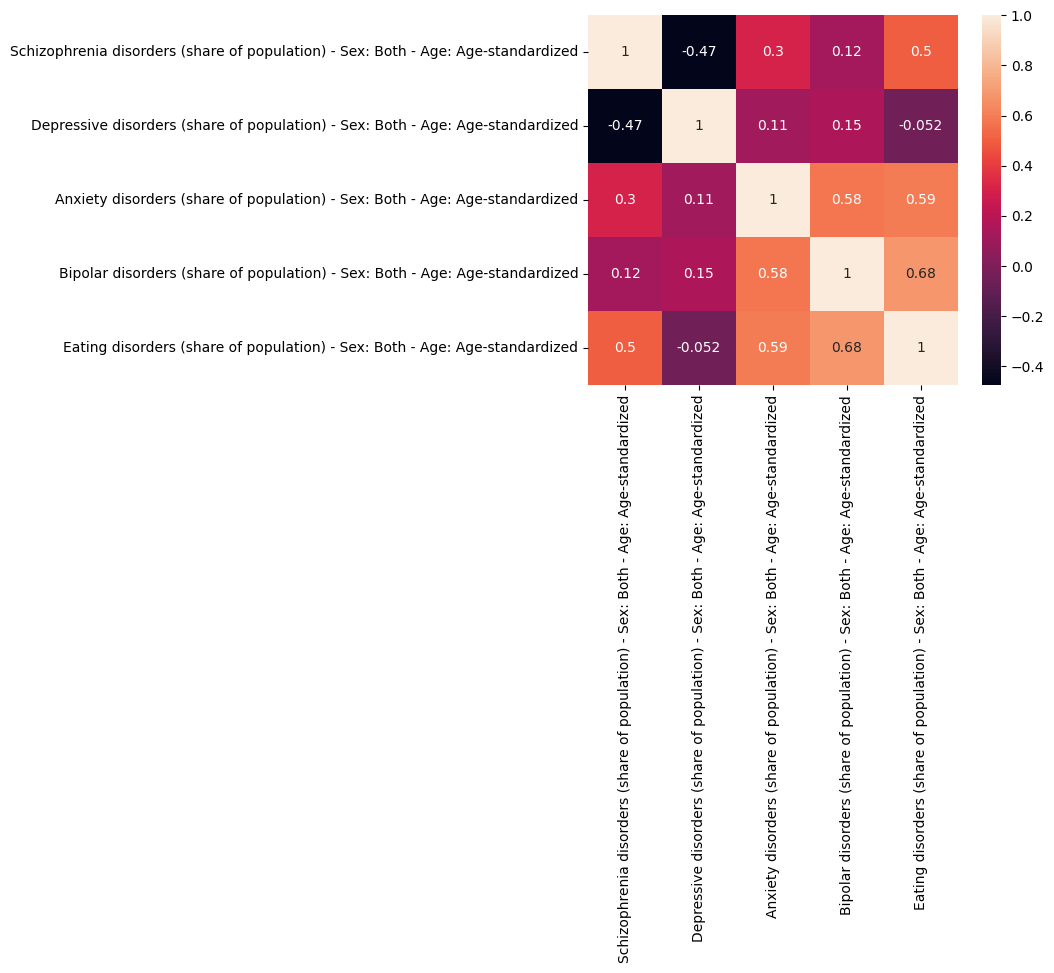

In [ ]:
Data_correlation_chat = sns.heatmap(Data_correlation, annot= True, square = True)
Data_correlation_chat

In [ ]:
df.corr()['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].sort_values(ascending=False)

,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,1.000000
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,0.153039
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,0.114429
Eating disorders (share of population) - Sex: Both - Age: Age-standardized,-0.052067
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,-0.474994


#### Interpretation on how other mental health disorders relate to Depressive disorders

##### Bipolar disorders (0.15): Weak positive correlation

##### Anxiety disorders (0.11): Also weakly correlated

##### Eating disorders (-0.05): Virtually no correlation — they tend to behave independently of depression in this dataset.

##### Schizophrenia (-0.47): Moderate negative correlation

In [ ]:
df.head()

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815


### Spliting the Data into X and y

In [ ]:
X = df.drop(['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], axis = 1)

In [ ]:
y = df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized']

In [ ]:
X

,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,0.223206,4.713314,0.703023,0.127700
1,0.222454,4.702100,0.702069,0.123256
2,0.221751,4.683743,0.700792,0.118844
3,0.220987,4.673549,0.700087,0.115089
4,0.220183,4.670810,0.699898,0.111815
...,...,...,...,...
6415,0.201042,3.184012,0.538596,0.095652
6416,0.201319,3.187148,0.538593,0.096662
6417,0.201639,3.188418,0.538589,0.097330
6418,0.201976,3.172111,0.538585,0.097909


In [ ]:
y

,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized
0,4.996118
1,4.989290
2,4.981346
3,4.976958
4,4.977782
...,...
6415,3.407624
6416,3.410755
6417,3.411965
6418,3.406929


#### Spliting the data into 80% train and 20% test size

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Training the model with Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

### Calculating the metrics

In [ ]:
from sklearn.metrics import mean_squared_error,	r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
y_linear = model.predict(x_test)
y_linear

array([3.33587502, 3.02185679, 3.73554181, ..., 4.2708536 , 3.32855801,
       3.7739682 ])

##### mean square error

In [ ]:
Mean_Square_error = mean_squared_error(y_test, y_linear)
print("Mean_square_error = ", Mean_Square_error)

Mean_square_error =  0.5952095427945372


##### RMSE

In [ ]:
#Calculate RMSE
RMSE = np.sqrt(Mean_Square_error)
print("Root Mean Square Error (RMSE):", RMSE)

Root Mean Square Error (RMSE): 0.771498245490252


##### R-squared

In [ ]:
r2 = r2_score(y_test, y_linear)
print("R-squared:", r2)

R-squared: 0.31023698091662266


##### Adjusted R_squared

In [ ]:
n = len(y_test)
p = 5  # number of predictors

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.30753837755557656


### Training with Lasso Regression

#### LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

#### Using Gridsearchcv for the best value for alpha to get the best score

In [ ]:
alpha_values = [0.001, 0.01, 0.1,0.2, 1, 10, 100]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
lasso_model = GridSearchCV(lasso, param_grid={'alpha': alpha_values}, cv=5)
lasso_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 1, 10, 100]})

In [ ]:
print("Best Lasso hyperparameter:", lasso_model.best_params_['alpha'])

Best Lasso hyperparameter: 0.001


In [ ]:
print("Best Lasso score:", lasso_model.best_score_)

Best Lasso score: 0.30312811080722063


##### The best parameter using GridSearchCV for Lasso is 0.001 and the best score is 0.30312811080722063

In [ ]:
 y_predict_lass	= lasso_model.predict(x_test)
 y_predict_lass

array([3.36754405, 3.06082519, 3.72580237, ..., 4.23003461, 3.35386579,
       3.80467427])

##### lasso mean squared error

In [ ]:
 mse = mean_squared_error(y_test,	y_predict_lass	)
 print("lasso Mean_Square_Error:",	mse)

lasso Mean_Square_Error: 0.5984389241971916


##### lasso RMSE

In [ ]:
#Calculate RMSE
RMSE = np.sqrt(mse)
print("Root Mean Square Error (RMSE):", RMSE)

Root Mean Square Error (RMSE): 0.7735883428524447


##### lasso r_squared

In [ ]:
r2 = r2_score(y_test, y_predict_lass)
print("R-squared:", r2)

R-squared: 0.3064945881861426


##### Adjusted r_2

In [ ]:
n = len(y_test)
p = 5  # number of predictors

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.3037813432259945


### Training with Ridge Regression

###  Ridge

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge_model = GridSearchCV(ridge, param_grid={'alpha': alpha_values}, cv=5)
ridge_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 1, 10, 100]})

In [ ]:
print("Best Ridge parameter:", ridge_model.best_params_['alpha'])
print("Best Ridge score:", ridge_model.best_score_)

Best Ridge parameter: 0.001
Best Ridge score: 0.3047738164924433


##### The best parameter using GridSearchCV for Lasso is 0.001 and the best score is 0.30477381649244323

In [ ]:
 y_predict_ridge = ridge_model.predict(x_test)
 y_predict_ridge

array([3.33594759, 3.02193878, 3.73553376, ..., 4.27075228, 3.32861446,
       3.77403915])

##### mse

In [ ]:
mse_ridge = mean_squared_error(y_test, y_predict_ridge)
print("Ridge regression	MSE:",	mse_ridge)

Ridge regression	MSE: 0.5952138664918762


##### RMSE

In [ ]:
#Calculate RMSE
RMSE = np.sqrt(mse_ridge)
print("Root Mean Square Error (RMSE):", RMSE)

Root Mean Square Error (RMSE): 0.7715010476285021


##### R2_squared

In [ ]:
r2 = r2_score(y_test, y_predict_ridge)
print("R-squared:", r2)

R-squared: 0.31023197036770533


##### Adjusted R2_squared

In [ ]:
n = len(y_test)
p = 5  # number of predictors

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.30753334740357274


### Training with Random Forest

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestRegressor(random_state=42)

#### Defining the parameter grid to search

In [ ]:
parameter_grid = {
    'n_estimators': [100, 200],        # number of trees
    'max_depth': [None, 10, 20],       # max depth of each tree
    'min_samples_split': [2, 5],       # minimum samples to split a node
    'min_samples_leaf': [1, 2] ,}      # minimum samples at a leaf node

In [ ]:
randomforest_model = RandomizedSearchCV(estimator=rf,
                                   param_distributions=parameter_grid,
                                   n_iter=10,        # Try 20 random combinations
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   scoring='r2',
                                   random_state=42)
randomforest_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
print("Best Parameters:", randomforest_model.best_params_)
print("Best R² Score:", randomforest_model.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best R² Score: 0.987449574574312


In [ ]:
y_pred =	randomforest_model.predict(x_test)

##### Mean_squared_error

In [ ]:
 random_mse = mean_squared_error(y_test, y_pred)
print("mean_squared_error",random_mse)

mean_squared_error 0.006609650784278317


##### RMSE

In [ ]:
#Calculate RMSE
RMSE = np.sqrt(random_mse)
print("Root Mean Square Error (RMSE):", RMSE)

Root Mean Square Error (RMSE): 0.08129975882054212


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9923403568789481


In [ ]:
n = len(y_test)
p = 5  # number of predictors

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)

Adjusted R-squared: 0.9923103895740926


In [ ]:
import pandas as pd

# Sample metric values (replace these with your actual values)
data = {
    'MSE': [0.5952, 0.5984, 0.5952, 0.0066],
    'RMSE': [0.7714, 0.7735, 0.7715, 0.0812],
    'R2_score': [0.3102, 0.3064, 0.3102, 0.9923],
    'Adjusted_R2_score': [0.3075, 0.3037, 0.3075, 0.9923]
}

models = ['Linear', 'Lasso', 'Ridge', 'Random Forest']

# Create DataFrame
df_metrics = pd.DataFrame(data, index=models)

# Display the DataFrame
print(df_metrics)


                  MSE    RMSE  R2_score  Adjusted_R2_score
Linear         0.5952  0.7714    0.3102             0.3075
Lasso          0.5984  0.7735    0.3064             0.3037
Ridge          0.5952  0.7715    0.3102             0.3075
Random Forest  0.0066  0.0812    0.9923             0.9923


### In Conclusion Random Forest gives a better result compare to Lasso, Ridge and Linear Regression

## Why Random Forest gives a better result

#### Random Forest regression outperformed linear, Lasso, and Ridge regression likely because the relationships between the mental health disorders and the target variable are not very related judging from their correlation matrix. Models like Linear, Lasso, and Ridge regression look for consistent and direct relationships between the conditions and the outcome like expecting that one condition always increases or decreases with another. But our data shows that's not the case. Random Forest doesn't need those direct connections to make sense of the data. It looks at many different combinations and patterns, even when some conditions aren’t strongly connected and still figures out how they affect the outcome. That’s why it gives better results."